In [1]:
import pandas as pd
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.metrics import mean_squared_error

In [2]:
df_covid = pd.read_excel('USA_covid_monthly_new_cases.xlsx')
df_covid
covid = df_covid[['date', 'new_cases']].copy()
covid['date'] = covid['date'].astype('datetime64[ns]')
covid.set_index('date', inplace=True)
covid

,new_cases
date,
2020-01-31,7
2020-02-29,17
2020-03-31,192054
2020-04-30,889072
2020-05-31,710396
2020-06-30,857250
2020-07-31,1899698
2020-08-31,1497991
2020-09-30,1199713


In [3]:
df_inflation = pd.read_excel('statistic_id273418_us-monthly-inflation-rate-december-2022.xlsx', skiprows=5, header=None, sheet_name='Data')
df_inflation.columns = ['0', 'date', 'inflation rate in %', 'none']
df_inflation['date'] = pd.to_datetime(df_inflation.date, format='%Y-%m')
df_inflation = df_inflation.drop(columns=['0', 'none'])
df_inflation

inflation = df_inflation[['date','inflation rate in %']].copy()
inflation['date'] = inflation['date'].dt.date
inflation.set_index('date', inplace=True)

In [4]:
df_unemploy = pd.read_excel('US_unemployment_rate.xlsx', skiprows=range(1,9))

In [5]:
df_YoY = pd.read_excel('US_Retail_Sales_YoY.xlsx', skiprows=range(1,9))

In [6]:
df_cosumers = pd.read_excel('surveys_of_consumers_University_of_michigan.xlsx')

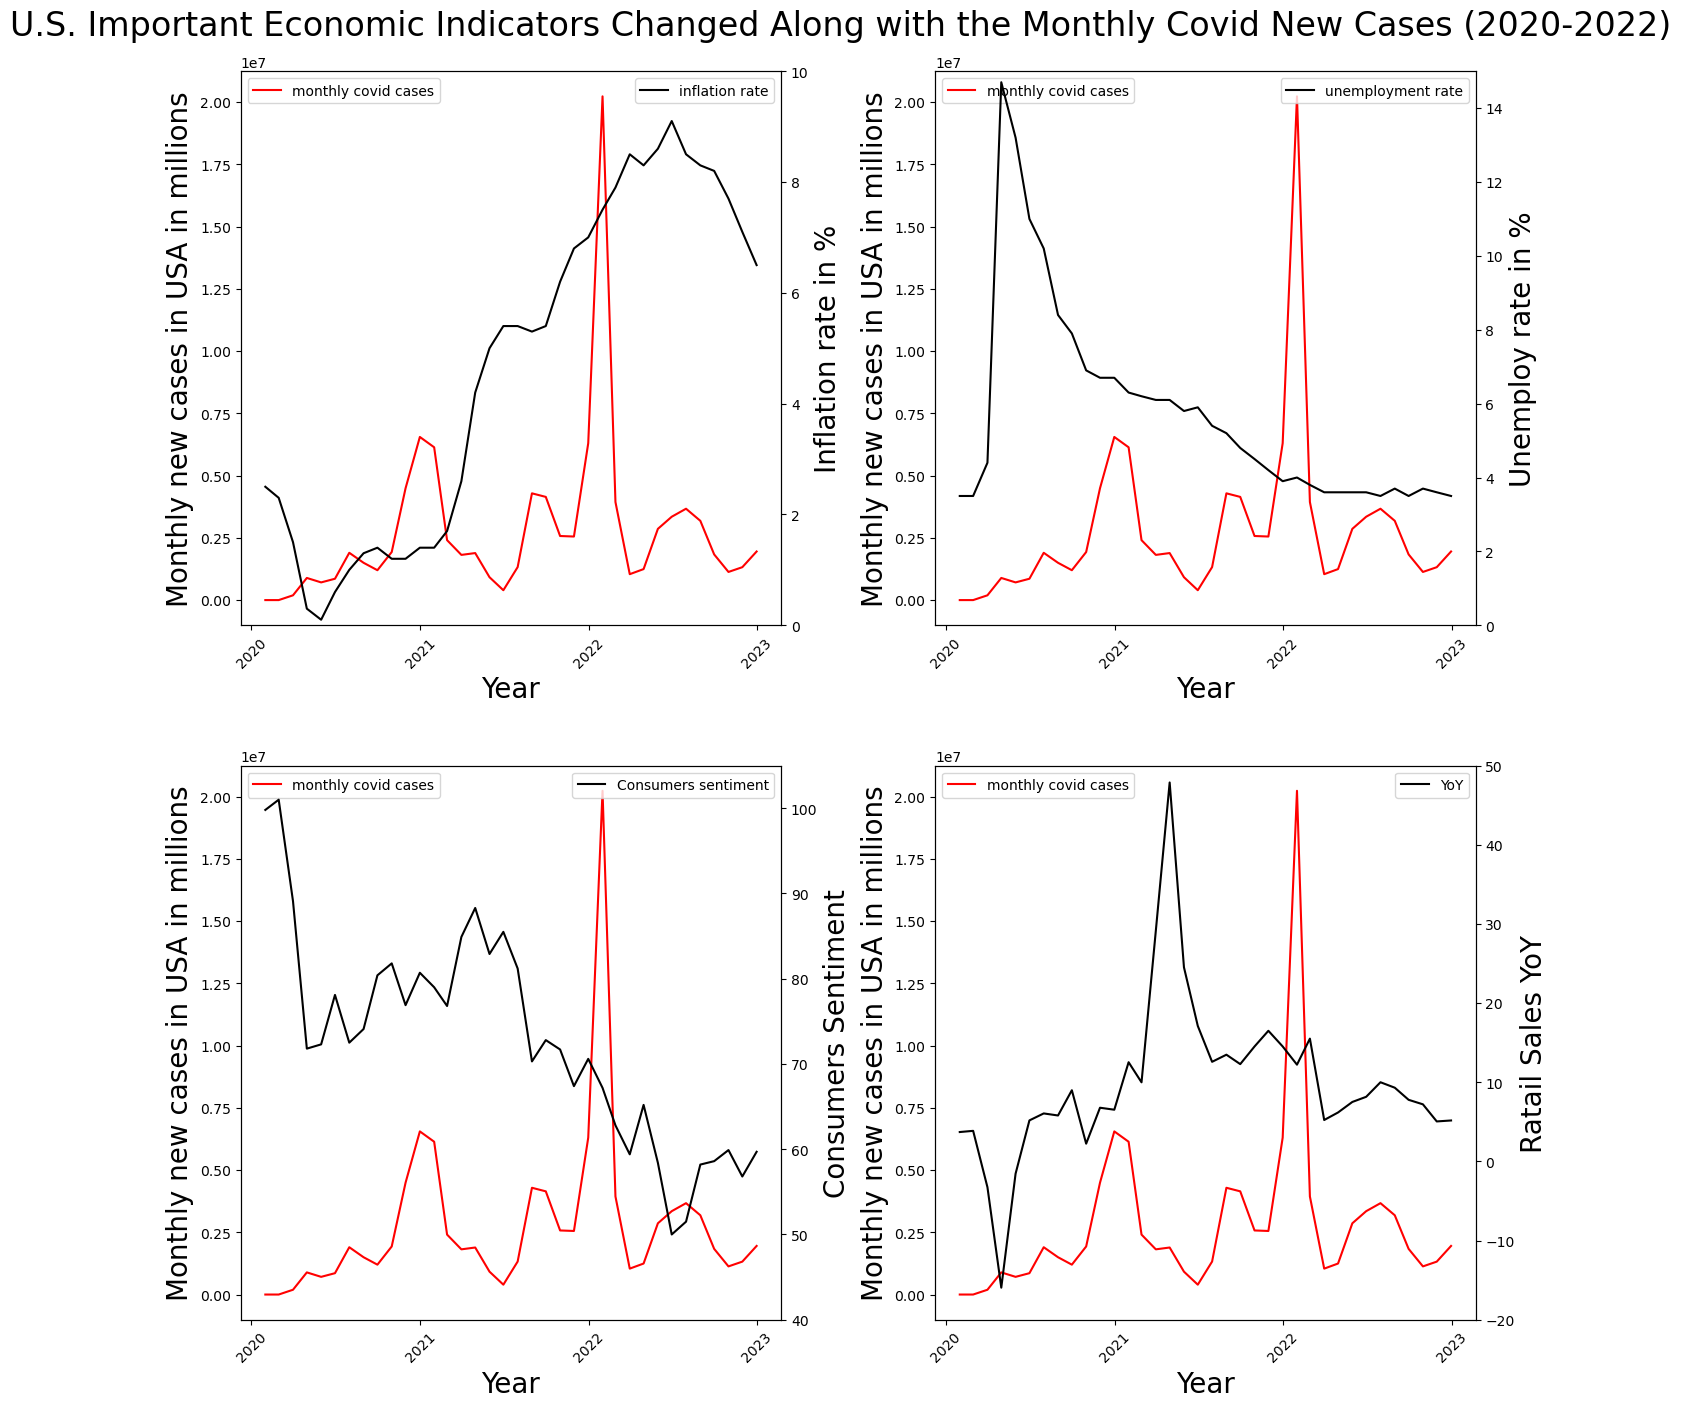

In [31]:
#covid, inflation, df_unemploy, df_cosumers, df_YoY
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=8.0)

ax1.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_1 = ax1.get_xticks()
ax1.set_xticks(xticks_1[::len(xticks_1) // 3])
ax1.tick_params(axis='x', rotation=45)
ax1.margins(x=0)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax1.legend()
ax1_inflation = ax1.twinx()
ax1_inflation.plot(inflation.index, inflation['inflation rate in %'], label='inflation rate', color='black')
ax1_inflation.set_ylim(0, 10)
ax1_inflation.set_ylabel('Inflation rate in %',fontsize=20)
ax1_inflation.legend()

ax2.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_2 = ax2.get_xticks()
ax2.set_xticks(xticks_2[::len(xticks_2) // 3])
ax2.tick_params(axis='x', rotation=45)
ax2.margins(x=0)
ax2.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax2.set_xlabel('Year',fontsize=20)
ax2.legend()
ax2_unemploy = ax2.twinx()
ax2_unemploy.plot(df_unemploy['Date'], df_unemploy['value (%)'], label='unemployment rate', color='black')
ax2_unemploy.set_ylim(0, 15)
ax2_unemploy.set_ylabel('Unemploy rate in %',fontsize=20)
ax2_unemploy.legend()

ax3.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_3 = ax3.get_xticks()
ax3.set_xticks(xticks_3[::len(xticks_3) // 3])
ax3.tick_params(axis='x', rotation=45)
ax3.margins(x=0)
ax3.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax3.set_xlabel('Year',fontsize=20)
ax3.legend()
ax3_cosumers = ax3.twinx()
ax3_cosumers.plot(df_cosumers['Date'], df_cosumers['Sentiment'], label='Consumers sentiment', color='black')
ax3_cosumers.set_ylim(40, 105)
ax3_cosumers.set_ylabel('Consumers Sentiment',fontsize=20)
ax3_cosumers.legend()

ax4.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_4 = ax4.get_xticks()
ax4.set_xticks(xticks_4[::len(xticks_4) // 3])
ax4.tick_params(axis='x', rotation=45)
ax4.margins(x=0)
ax4.set_xlabel('Year',fontsize=20)
ax4.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax4.legend()
ax4_YoY = ax4.twinx()
ax4_YoY.plot(df_YoY['Date'], df_YoY['Value (%)'], label='YoY', color='black')
ax4_YoY.set_ylim(-20, 50)
ax4_YoY.set_ylabel('Ratail Sales YoY',fontsize=20)
ax4_YoY.legend()


ax1.set_title("U.S. Important Economic Indicators Changed Along with the Monthly Covid New Cases (2020-2022)", x=1.11, y=1.05, fontsize=24)
#plt.savefig('four_dataset_1.png')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import precision_score
from scipy.stats import pearsonr

In [9]:
print(covid['new_cases'].values/1000000)

[7.000000e-06 1.700000e-05 1.920540e-01 8.890720e-01 7.103960e-01
 8.572500e-01 1.899698e+00 1.497991e+00 1.199713e+00 1.930152e+00
 4.491575e+00 6.551956e+00 6.137229e+00 2.407191e+00 1.815185e+00
 1.888570e+00 9.183970e-01 3.958780e-01 1.325072e+00 4.287672e+00
 4.144489e+00 2.573736e+00 2.552962e+00 6.301355e+00 2.023178e+01
 3.938389e+00 1.040696e+00 1.244746e+00 2.861179e+00 3.348059e+00
 3.669554e+00 3.183248e+00 1.833486e+00 1.130188e+00 1.321265e+00
 1.951712e+00]


In [10]:
#covid, inflation
model_inflation = LinearRegression()
model_inflation.fit(covid[['new_cases']].values/1000000, inflation[['inflation rate in %']].values)
t0, t1 = model_inflation.intercept_[0], model_inflation.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=4.13, θ1=1.86e-01


In [11]:
#covid, df_unemploy
model_unemploy = LinearRegression()
model_unemploy.fit(covid[['new_cases']].values/1000000, df_unemploy[['value (%)']].values)
t2, t3 = model_unemploy.intercept_[0], model_unemploy.coef_[0][0]
print(f"θ0={t2:.2f}, θ1={t3:.2e}")

θ0=6.10, θ1=-1.42e-01


In [12]:
#covid, df_cosumers
model_cosumers = LinearRegression()
model_cosumers.fit(covid[['new_cases']].values/1000000, df_cosumers[['Sentiment']].values)
t4, t5 = model_cosumers.intercept_[0], model_cosumers.coef_[0][0]
print(f"θ0={t4:.2f}, θ1={t5:.2e}")

θ0=74.79, θ1=-7.42e-01


In [13]:
#covid, df_YoY
model_YoY = LinearRegression()
model_YoY.fit(covid[['new_cases']].values/1000000, df_YoY[['Value (%)']].values)
t6, t7 = model_YoY.intercept_[0], model_YoY.coef_[0][0]
print(f"θ0={t6:.2f}, θ1={t7:.2e}")

θ0=8.75, θ1=3.74e-01


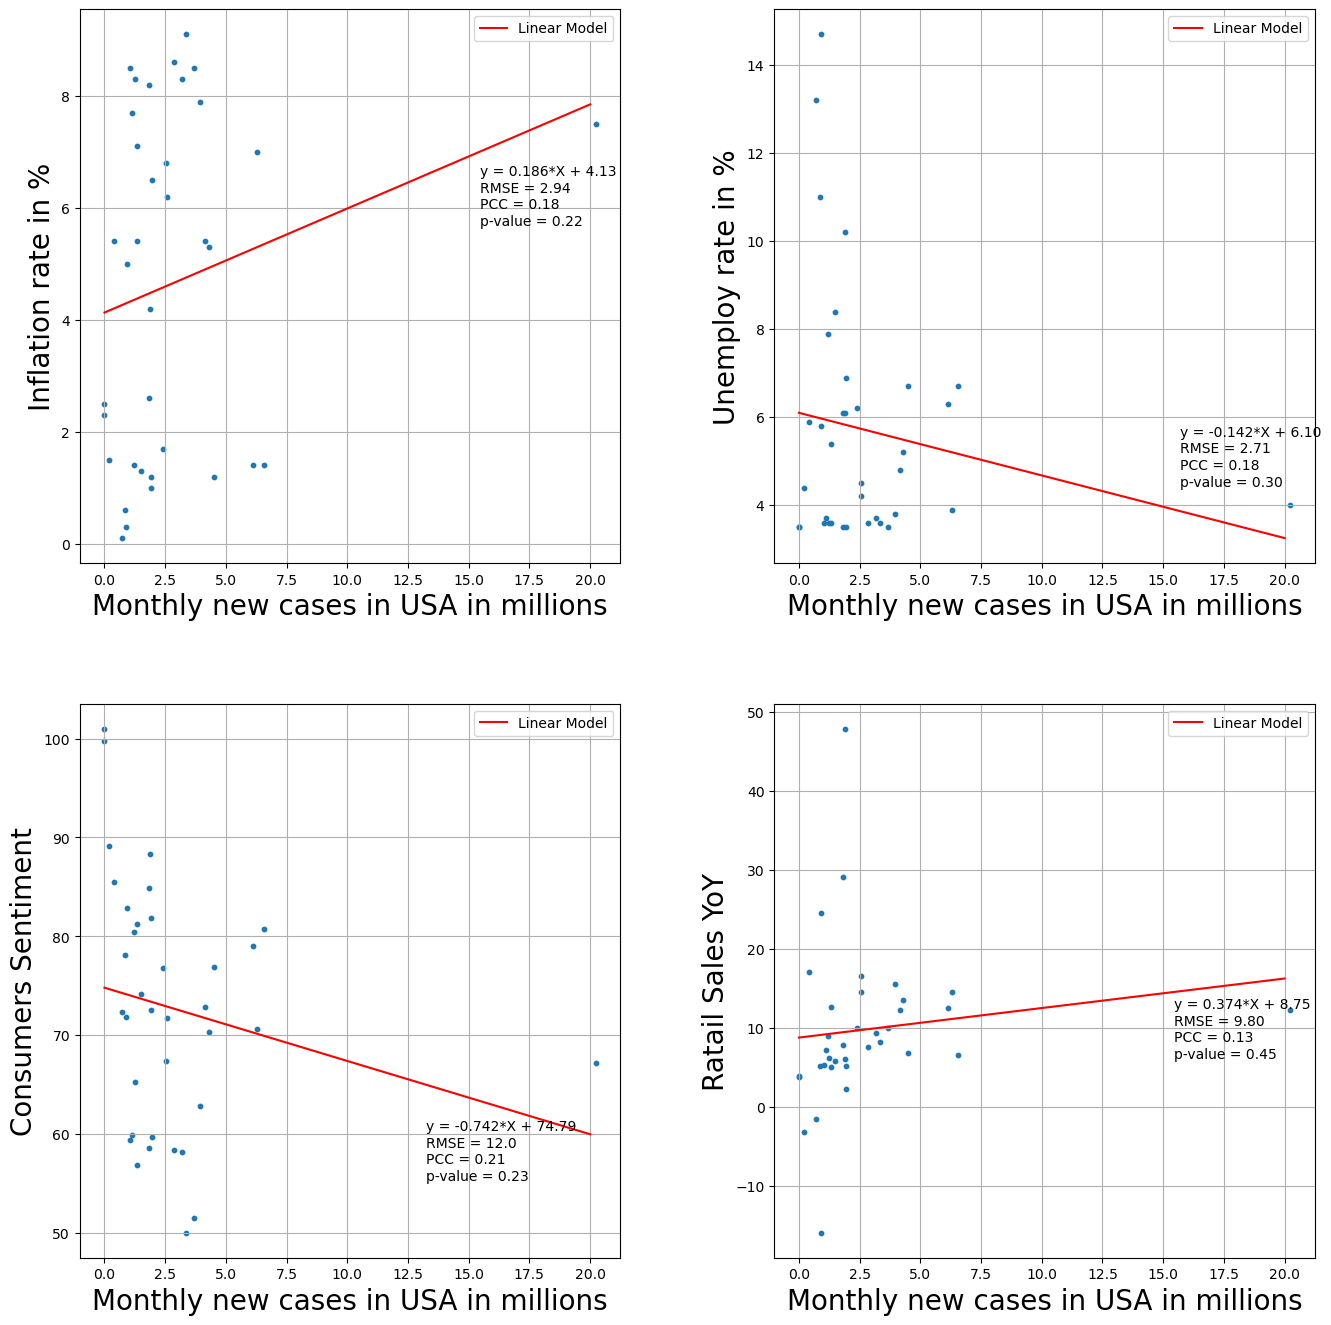

In [36]:
#covid, inflation, df_unemploy, df_cosumers, df_YoY
case_num = np.linspace(0, 20, 40)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=8.0)

ax1.scatter(covid['new_cases']/1000000, inflation['inflation rate in %'], s=10)
ax1.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax1.set_ylabel('Inflation rate in %',fontsize=20)
ax1.plot(case_num, t0 + t1 * case_num, 'r', label='Linear Model')
ax1.grid()
ax1.legend()
ax1.text(0.74, 0.7, 'y = 0.186*X + 4.13', transform=ax1.transAxes)
ax1.text(0.74, 0.67, 'RMSE = 2.94', transform=ax1.transAxes)
ax1.text(0.74, 0.64, 'PCC = 0.18', transform=ax1.transAxes)
ax1.text(0.74, 0.61, 'p-value = 0.22', transform=ax1.transAxes)

ax2.scatter(covid['new_cases']/1000000, df_unemploy['value (%)'], s=10)
ax2.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax2.set_ylabel('Unemploy rate in %',fontsize=20)
ax2.plot(case_num, t2 + t3 * case_num, 'r', label='Linear Model')
ax2.grid()
ax2.legend()
ax2.text(0.75, 0.23, 'y = -0.142*X + 6.10', transform=ax2.transAxes)
ax2.text(0.75, 0.2, 'RMSE = 2.71', transform=ax2.transAxes)
ax2.text(0.75, 0.17, 'PCC = 0.18', transform=ax2.transAxes)
ax2.text(0.75, 0.14, 'p-value = 0.30', transform=ax2.transAxes)

ax3.scatter(covid['new_cases']/1000000, df_cosumers['Sentiment'], s=10)
ax3.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax3.set_ylabel('Consumers Sentiment',fontsize=20)
ax3.plot(case_num, t4 + t5 * case_num, 'r', label='Linear Model')
ax3.legend()
ax3.grid()
ax3.text(0.64, 0.23, 'y = -0.742*X + 74.79', transform=ax3.transAxes)
ax3.text(0.64, 0.2, 'RMSE = 12.0', transform=ax3.transAxes)
ax3.text(0.64, 0.17, 'PCC = 0.21', transform=ax3.transAxes)
ax3.text(0.64, 0.14, 'p-value = 0.23', transform=ax3.transAxes)


ax4.scatter(covid['new_cases']/1000000, df_YoY['Value (%)'], s=10)
ax4.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax4.set_ylabel('Ratail Sales YoY',fontsize=20)
ax4.plot(case_num, t6 + t7 * case_num, 'r', label='Linear Model')
ax4.legend()
ax4.grid()
ax4.text(0.74, 0.45, 'y = 0.374*X + 8.75', transform=ax4.transAxes)
ax4.text(0.74, 0.42, 'RMSE = 9.80', transform=ax4.transAxes)
ax4.text(0.74, 0.39, 'PCC = 0.13', transform=ax4.transAxes)
ax4.text(0.74, 0.36, 'p-value = 0.45', transform=ax4.transAxes)

#plt.savefig('four_dataset_1_linear_model.png')
plt.show()

In [37]:
df_PMI = pd.read_excel('PMI.xlsx')

In [16]:
df_consumer_credit = pd.read_excel('US_consumer_credit.xlsx')

In [17]:
df_CPI = pd.read_excel('US_core_CPI.xlsx')

In [18]:
df_personal_spend = pd.read_excel('US_personal_spending.xlsx')

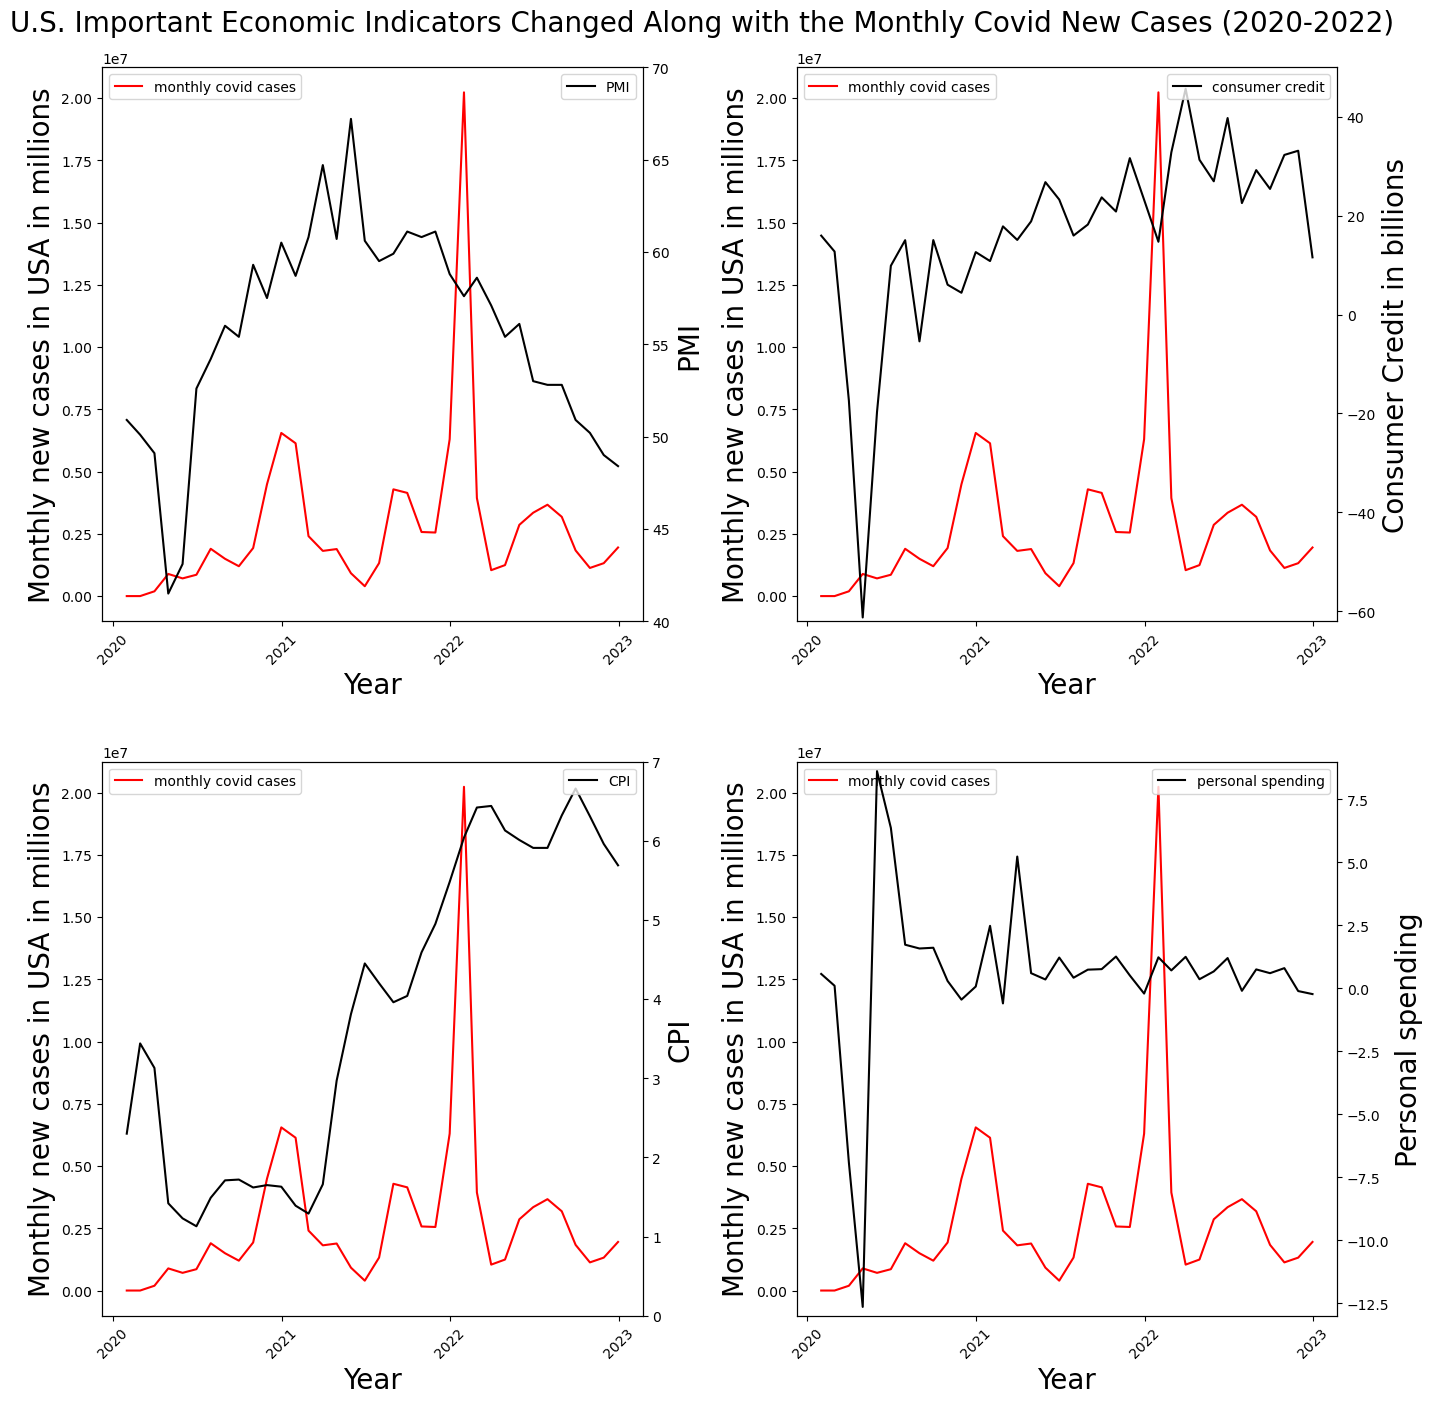

In [38]:
#covid, df_PMI, df_consumer_credit, df_CPI, df_personal_spend
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=8.0)

ax1.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_1 = ax1.get_xticks()
ax1.set_xticks(xticks_1[::len(xticks_1) // 3])
ax1.tick_params(axis='x', rotation=45)
ax1.margins(x=0)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax1.legend()
ax1_PMI = ax1.twinx()
ax1_PMI.plot(df_PMI['Date'], df_PMI['Value'], label='PMI', color='black')
ax1_PMI.set_ylim(40, 70)
ax1_PMI.set_ylabel('PMI',fontsize=20)
ax1_PMI.legend()

ax2.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_2 = ax2.get_xticks()
ax2.set_xticks(xticks_2[::len(xticks_2) // 3])
ax2.tick_params(axis='x', rotation=45)
ax2.margins(x=0)
ax2.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax2.set_xlabel('Year',fontsize=20)
ax2.legend()
ax2_cosumer_credit = ax2.twinx()
ax2_cosumer_credit.plot(df_consumer_credit['Date'], df_consumer_credit['value in B'], label='consumer credit', color='black')
ax2_cosumer_credit.set_ylim(-62, 50)
ax2_cosumer_credit.set_ylabel('Consumer Credit in billions',fontsize=20)
ax2_cosumer_credit.legend(loc='upper right')

ax3.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_3 = ax3.get_xticks()
ax3.set_xticks(xticks_3[::len(xticks_3) // 3])
ax3.tick_params(axis='x', rotation=45)
ax3.margins(x=0)
ax3.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax3.set_xlabel('Year',fontsize=20)
ax3.legend()
ax3_CPI = ax3.twinx()
ax3_CPI.plot(df_CPI['Date'], df_CPI['value in %'], label='CPI', color='black')
ax3_CPI.set_ylim(0, 7)
ax3_CPI.set_ylabel('CPI',fontsize=20)
ax3_CPI.legend(loc='upper right')

ax4.plot(covid.index, covid['new_cases'], label='monthly covid cases', color='r')
xticks_4 = ax4.get_xticks()
ax4.set_xticks(xticks_4[::len(xticks_4) // 3])
ax4.tick_params(axis='x', rotation=45)
ax4.margins(x=0)
ax4.set_xlabel('Year',fontsize=20)
ax4.set_ylabel('Monthly new cases in USA in millions',fontsize=20)
ax4.legend()
ax4_personal_spend = ax4.twinx()
ax4_personal_spend.plot(df_personal_spend['Date'], df_personal_spend['value in %'], label='personal spending', color='black')
ax4_personal_spend.set_ylim(-13, 9)
ax4_personal_spend.set_ylabel('Personal spending',fontsize=20)
ax4_personal_spend.legend()


ax1.set_title("U.S. Important Economic Indicators Changed Along with the Monthly Covid New Cases (2020-2022)", x=1.11, y=1.05, fontsize=20)
#plt.savefig('four_dataset_2.png')
plt.show()

In [20]:
#covid, df_PMI
model_PMI = LinearRegression()
model_PMI.fit(covid[['new_cases']].values/1000000, df_PMI[['Value']].values)
t8, t9 = model_PMI.intercept_[0], model_PMI.coef_[0][0]
print(f"θ0={t8:.2f}, θ1={t9:.2e}")

θ0=54.63, θ1=3.89e-01


In [21]:
#covid, df_consumer_credit
model_consumer_credit = LinearRegression()
model_consumer_credit.fit(covid[['new_cases']].values/1000000, df_consumer_credit[['value in B']].values)
t10, t11 = model_consumer_credit.intercept_[0], model_consumer_credit.coef_[0][0]
print(f"θ0={t10:.2f}, θ1={t11:.2e}")

θ0=14.74, θ1=4.82e-01


In [22]:
#covid, df_CPI
model_CPI = LinearRegression()
model_CPI.fit(covid[['new_cases']].values/1000000, df_CPI[['value in %']].values)
t12, t13 = model_CPI.intercept_[0], model_CPI.coef_[0][0]
print(f"θ0={t12:.2f}, θ1={t13:.2e}")

θ0=3.55, θ1=1.11e-01


In [23]:
#covid, df_personal_spend
model_personal_spend = LinearRegression()
model_personal_spend.fit(covid[['new_cases']].values/1000000, df_personal_spend[['value in %']].values)
t14, t15 = model_personal_spend.intercept_[0], model_personal_spend.coef_[0][0]
print(f"θ0={t14:.2f}, θ1={t15:.2e}")

θ0=0.43, θ1=5.15e-02


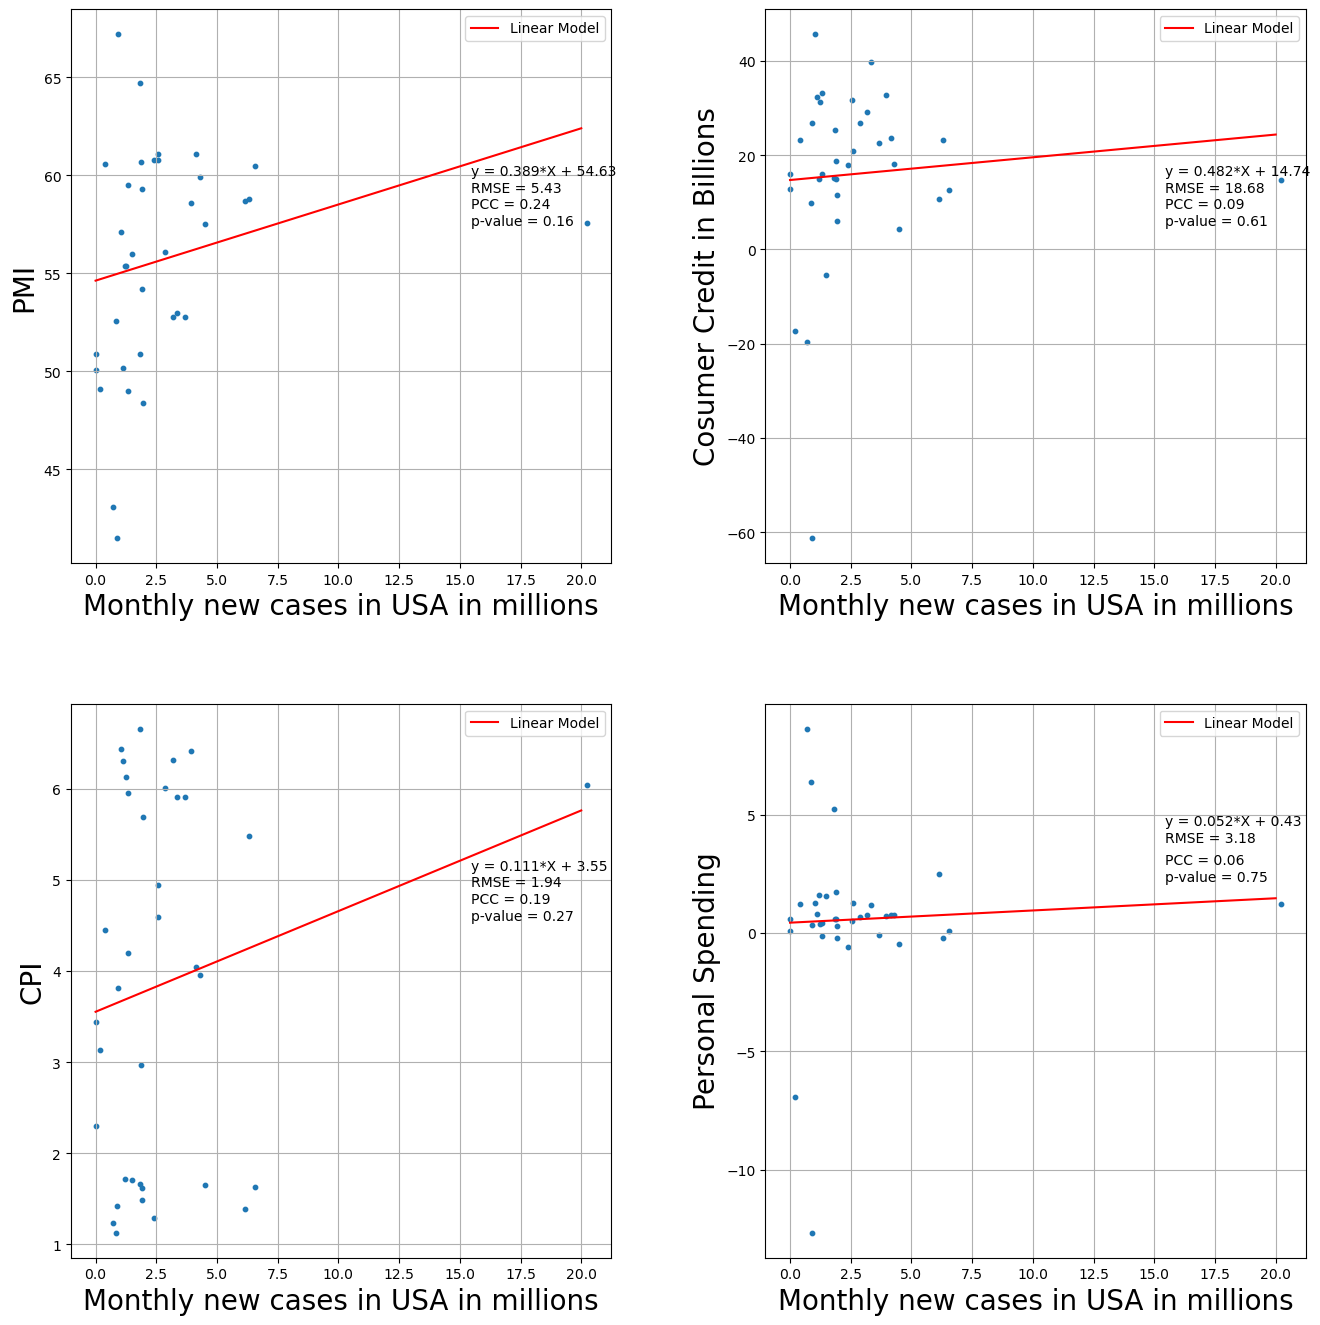

In [43]:
#covid, df_PMI, df_consumer_credit, df_CPI, df_personal_spend
case_num = np.linspace(0, 20, 40)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=8.0)

ax1.scatter(covid['new_cases']/1000000, df_PMI['Value'], s=10)
ax1.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax1.set_ylabel('PMI',fontsize=20)
ax1.plot(case_num, t8 + t9 * case_num, 'r', label='Linear Model')
ax1.grid()
ax1.legend()
ax1.text(0.74, 0.7, 'y = 0.389*X + 54.63', transform=ax1.transAxes)
ax1.text(0.74, 0.67, 'RMSE = 5.43', transform=ax1.transAxes)
ax1.text(0.74, 0.64, 'PCC = 0.24', transform=ax1.transAxes)
ax1.text(0.74, 0.61, 'p-value = 0.16', transform=ax1.transAxes)

ax2.scatter(covid['new_cases']/1000000, df_consumer_credit['value in B'], s=10)
ax2.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax2.set_ylabel('Cosumer Credit in Billions',fontsize=20)
ax2.plot(case_num, t10 + t11 * case_num, 'r', label='Linear Model')
ax2.grid()
ax2.legend()
ax2.text(0.74, 0.7, 'y = 0.482*X + 14.74', transform=ax2.transAxes)
ax2.text(0.74, 0.67, 'RMSE = 18.68', transform=ax2.transAxes)
ax2.text(0.74, 0.64, 'PCC = 0.09', transform=ax2.transAxes)
ax2.text(0.74, 0.61, 'p-value = 0.61', transform=ax2.transAxes)

ax3.scatter(covid['new_cases']/1000000, df_CPI['value in %'], s=10)
ax3.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax3.set_ylabel('CPI',fontsize=20)
ax3.plot(case_num, t12 + t13 * case_num, 'r', label='Linear Model')
ax3.grid()
ax3.legend()
ax3.text(0.74, 0.7, 'y = 0.111*X + 3.55', transform=ax3.transAxes)
ax3.text(0.74, 0.67, 'RMSE = 1.94', transform=ax3.transAxes)
ax3.text(0.74, 0.64, 'PCC = 0.19', transform=ax3.transAxes)
ax3.text(0.74, 0.61, 'p-value = 0.27', transform=ax3.transAxes)

ax4.scatter(covid['new_cases']/1000000, df_personal_spend['value in %'], s=10)
ax4.set_xlabel('Monthly new cases in USA in millions',fontsize=20)
ax4.set_ylabel('Personal Spending',fontsize=20)
ax4.plot(case_num, t14 + t15 * case_num, 'r', label='Linear Model')
ax4.grid()
ax4.legend()
ax4.text(0.74, 0.78, 'y = 0.052*X + 0.43', transform=ax4.transAxes)
ax4.text(0.74, 0.75, 'RMSE = 3.18', transform=ax4.transAxes)
ax4.text(0.74, 0.71, 'PCC = 0.06', transform=ax4.transAxes)
ax4.text(0.74, 0.68, 'p-value = 0.75', transform=ax4.transAxes)

#plt.savefig('four_dataset_2_linear_model.png')
plt.show()

In [25]:
#inflation, df_unemploy, df_cosumers, df_YoY, df_PMI, df_consumer_credit, df_CPI, df_personal_spend

In [26]:
rmse_inflation = mean_squared_error(inflation[['inflation rate in %']], model_inflation.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_inflation = pearsonr(np.ravel(inflation[['inflation rate in %']].values, order='C'), model_inflation.predict(covid[['new_cases']].values/1000000))
rmse_unemploy = mean_squared_error(df_unemploy[['value (%)']], model_unemploy.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_unemploy = pearsonr(np.ravel(df_unemploy[['value (%)']].values, order='C'), model_unemploy.predict(covid[['new_cases']].values/1000000))
rmse_cosumers = mean_squared_error(df_cosumers[['Sentiment']], model_cosumers.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_cosumers = pearsonr(np.ravel(df_cosumers[['Sentiment']].values, order='C'), model_cosumers.predict(covid[['new_cases']].values/1000000))
rmse_YoY = mean_squared_error(df_YoY[['Value (%)']], model_YoY.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_YoY = pearsonr(np.ravel(df_YoY[['Value (%)']].values, order='C'), model_YoY.predict(covid[['new_cases']].values/1000000))
rmse_PMI = mean_squared_error(df_PMI[['Value']], model_PMI.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_PMI = pearsonr(np.ravel(df_PMI[['Value']].values, order='C'), model_PMI.predict(covid[['new_cases']].values/1000000))
rmse_consumer_credit = mean_squared_error(df_consumer_credit[['value in B']], model_consumer_credit.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_consumer_credit = pearsonr(np.ravel(df_consumer_credit[['value in B']].values, order='C'), model_consumer_credit.predict(covid[['new_cases']].values/1000000))
rmse_CPI = mean_squared_error(df_CPI[['value in %']], model_CPI.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_CPI = pearsonr(np.ravel(df_CPI[['value in %']].values, order='C'), model_CPI.predict(covid[['new_cases']].values/1000000))
rmse_personal_spend = mean_squared_error(df_personal_spend[['value in %']], model_personal_spend.predict(covid[['new_cases']].values/1000000), squared=False)
pcc_personal_spend = pearsonr(np.ravel(df_personal_spend[['value in %']].values, order='C'), model_personal_spend.predict(covid[['new_cases']].values/1000000))

In [27]:
print(rmse_inflation)
print(pcc_inflation)
print(rmse_unemploy)
print(pcc_unemploy)
print(rmse_cosumers)
print(pcc_cosumers)
print(rmse_YoY)
print(pcc_YoY)
print(rmse_PMI)
print(pcc_PMI)
print(rmse_consumer_credit)
print(pcc_consumer_credit)
print(rmse_CPI)
print(pcc_CPI)
print(rmse_personal_spend)
print(pcc_personal_spend)

2.940734157029583
PearsonRResult(statistic=array([0.2102942331509671], dtype=object), pvalue=0.21830111401076605)
2.7091353020365965
PearsonRResult(statistic=array([0.17594973864941124], dtype=object), pvalue=0.3046669047768247)
12.000364762481114
PearsonRResult(statistic=array([0.20578052741601222], dtype=object), pvalue=0.2285714626577125)
9.801426213467
PearsonRResult(statistic=array([0.12872812000947273], dtype=object), pvalue=0.45432028527304086)
5.425779006476609
PearsonRResult(statistic=array([0.23672405537258115], dtype=object), pvalue=0.16450842157259354)
18.67632632230012
PearsonRResult(statistic=array([0.08751119959367391], dtype=object), pvalue=0.6117955215029177)
1.9369271000585004
PearsonRResult(statistic=array([0.19051167816767936], dtype=object), pvalue=0.26572541730753346)
3.1825260239525424
PearsonRResult(statistic=array([0.05501086506876652], dtype=object), pvalue=0.7499858537036784)
